# Hypothesis 1
The exterior colors of most used cars are relatively concentrated. Except for special colors such as red, the second-hand price will not fluctuate too much due to color.

# Hypothesis 2
The interior colors of high-end vehicles are generally red, so the price of used cars with these colors will be relatively higher.

In [10]:
import pandas as pd

clean_data = pd.read_csv("carinfo_after_pre_clean.csv")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           10346 non-null  int64  
 1   year                                 10346 non-null  int64  
 2   make                                 10346 non-null  object 
 3   model                                10346 non-null  object 
 4   price                                10346 non-null  int64  
 5   mileage                              10346 non-null  int64  
 6   Miles per gallon                     9658 non-null   object 
 7   Transmission                         9858 non-null   object 
 8   owner                                10346 non-null  float64
 9   VIN                                  10346 non-null  object 
 10  class                                10346 non-null  object 
 11  Auction Brand / Issues      

# Data cleaning
## Remove data whose color is empty
## Remove duplicates whose VIN are the same

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(clean_data)
df_cleaned_1 = df.dropna(subset = ['exterior_color', 'interior_color'])
df_cleaned = df_cleaned_1[df_cleaned_1['price'] != 0]
df_unique = df_cleaned.drop_duplicates(subset = 'VIN', keep = False)

df_unique

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
17,17,2018,Subaru,Impreza 2.0I Premium,17998,67000,28 city/37 hwy,Automatic,1.0,4S3GTAB63J3719160,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
18,18,2016,Subaru,Impreza 2.0I Sport Premium,13998,120000,27 city/36 hwy,Automatic,3.0,JF1GPAP66G8241959,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
19,19,2021,Subaru,Ascent Limited,27998,61000,20 city/26 hwy,Automatic,2.0,4S4WMAPD2M3400140,...,4.0,Turbo Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Brown,Tan
20,20,2023,Subaru,Crosstrek,20998,88000,22 city/29 hwy,Manual 6 Speed,1.0,JF2GTAAC4P9295325,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
21,21,2022,Subaru,Crosstrek Sport,27998,22000,27 city/34 hwy,Automatic,1.0,JF2GTHSC1NH258551,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,10362,2020,Acura,MDX Technology,22998,117000,20 city/27 hwy,Automatic,1.0,5J8YD3H59LL010345,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Gray
10342,10363,2016,Acura,RDX,20998,66000,20 city/28 hwy,Automatic,2.0,5J8TB3H78GL018783,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Blue,Gray
10343,10364,2020,Acura,MDX SH-AWD A-Spec,32998,34000,19 city/26 hwy,Automatic,1.0,5J8YD4H08LL015157,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Black,Black
10344,10365,2021,Acura,TLX Technology,28998,39000,22 city/31 hwy,Automatic,1.0,19UUB5F45MA007014,...,4.0,Turbo Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black


# Color EDA

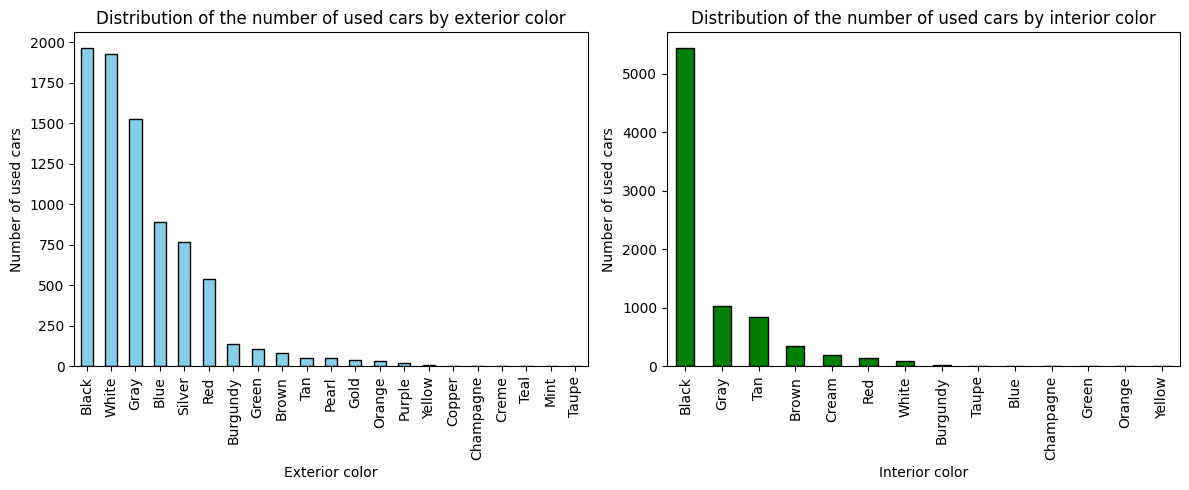

In [54]:
exterior_color_count = df_unique["exterior_color"].value_counts()
interior_color_count = df_unique["interior_color"].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

exterior_color_count.plot(kind = 'bar', ax = ax[0], color = 'skyblue', edgecolor = 'black')
ax[0].set_title('Distribution of the number of used cars by exterior color')
ax[0].set_xlabel('Exterior color')
ax[0].set_ylabel('Number of used cars')

interior_color_count.plot(kind = 'bar', ax = ax[1], color = 'green', edgecolor = 'black')
ax[1].set_title('Distribution of the number of used cars by interior color')
ax[1].set_xlabel('Interior color')
ax[1].set_ylabel('Number of used cars')

fig.tight_layout()
plt.show()

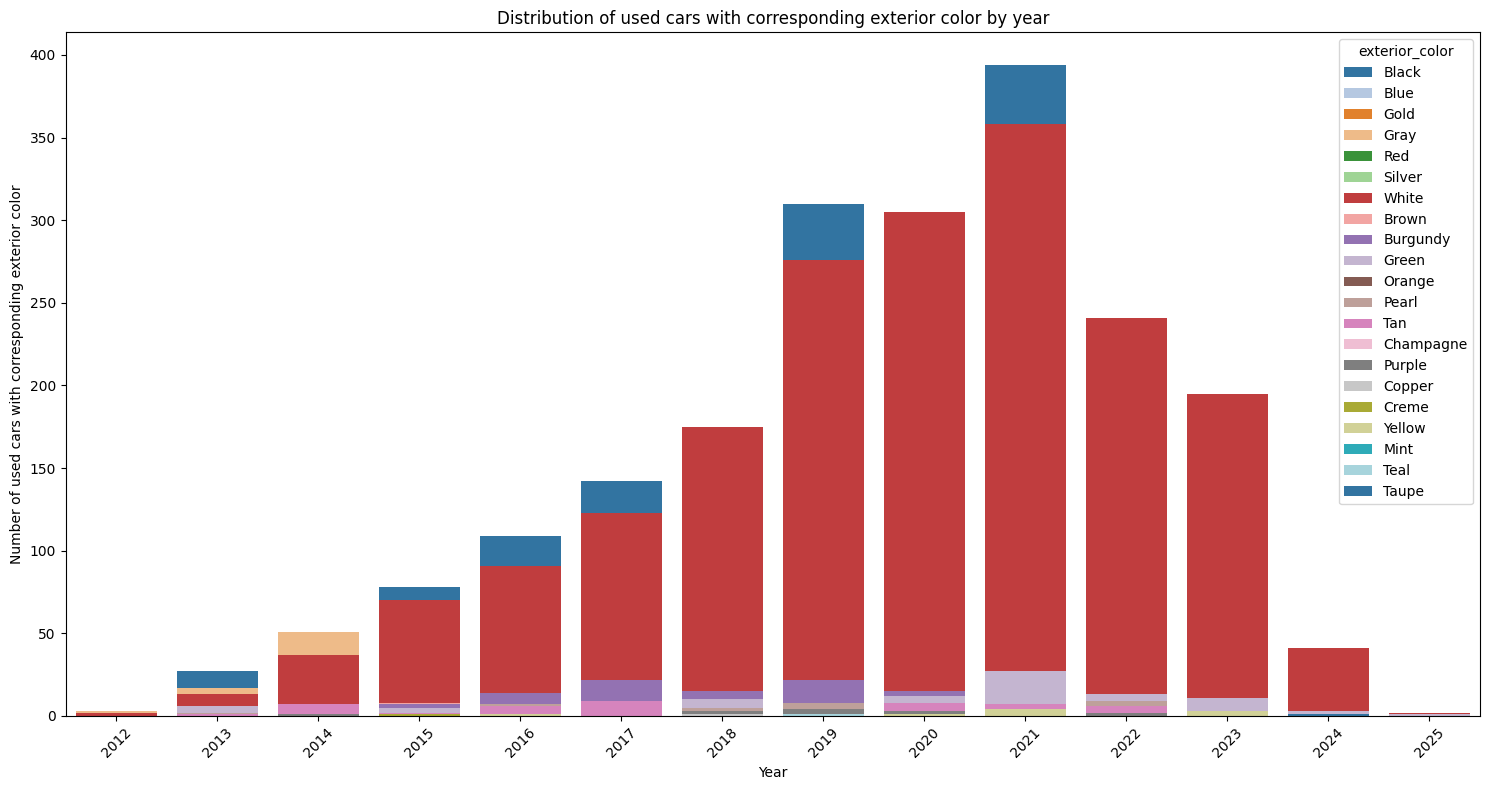

In [55]:
import seaborn as sns

color_year_counts = df_unique.groupby(['year', 'exterior_color']).size().reset_index(name = 'count_by_year')

plt.figure(figsize=(15, 8))

sns.barplot(x = 'year', y = 'count_by_year', hue = 'exterior_color', data = color_year_counts, dodge = False, palette = "tab20")

plt.xticks(rotation = 45)

plt.title('Distribution of used cars with corresponding exterior color by year')
plt.xlabel('Year')
plt.ylabel('Number of used cars with corresponding exterior color')

plt.tight_layout()
plt.show()

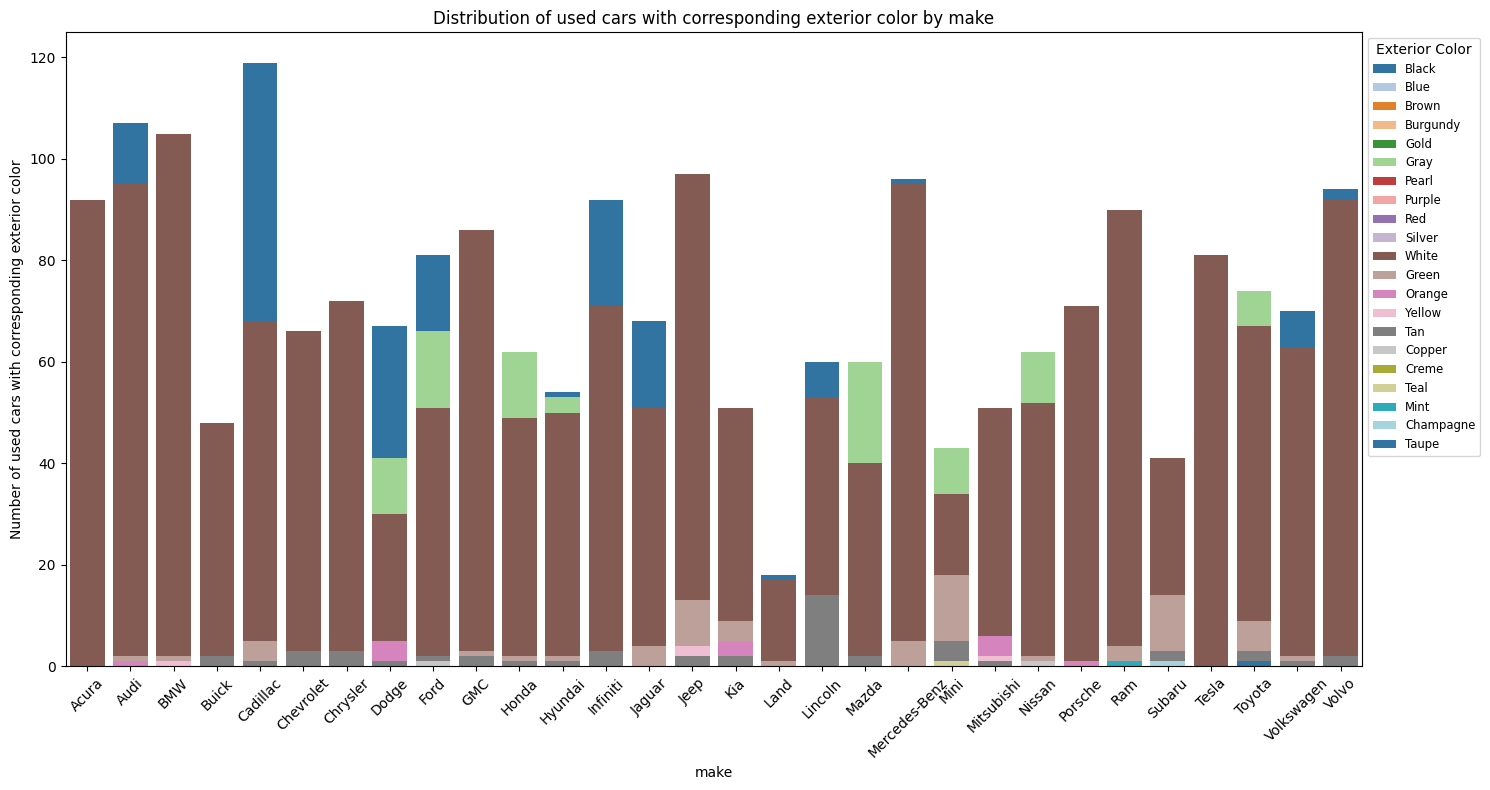

In [56]:
color_make_counts = df_unique.groupby(['make', 'exterior_color']).size().reset_index(name = 'count_by_make')

plt.figure(figsize=(15, 8))

sns.barplot(x = 'make', y = 'count_by_make', hue = 'exterior_color', data = color_make_counts, dodge = False, palette = "tab20")

plt.xticks(rotation = 45)

plt.title('Distribution of used cars with corresponding exterior color by make')
plt.xlabel('make')
plt.ylabel('Number of used cars with corresponding exterior color')
plt.legend(title = 'Exterior Color', bbox_to_anchor = (1, 1), loc = 'upper left', fontsize = 'small', title_fontsize = 'medium', ncol = 1)

plt.tight_layout()
plt.show()

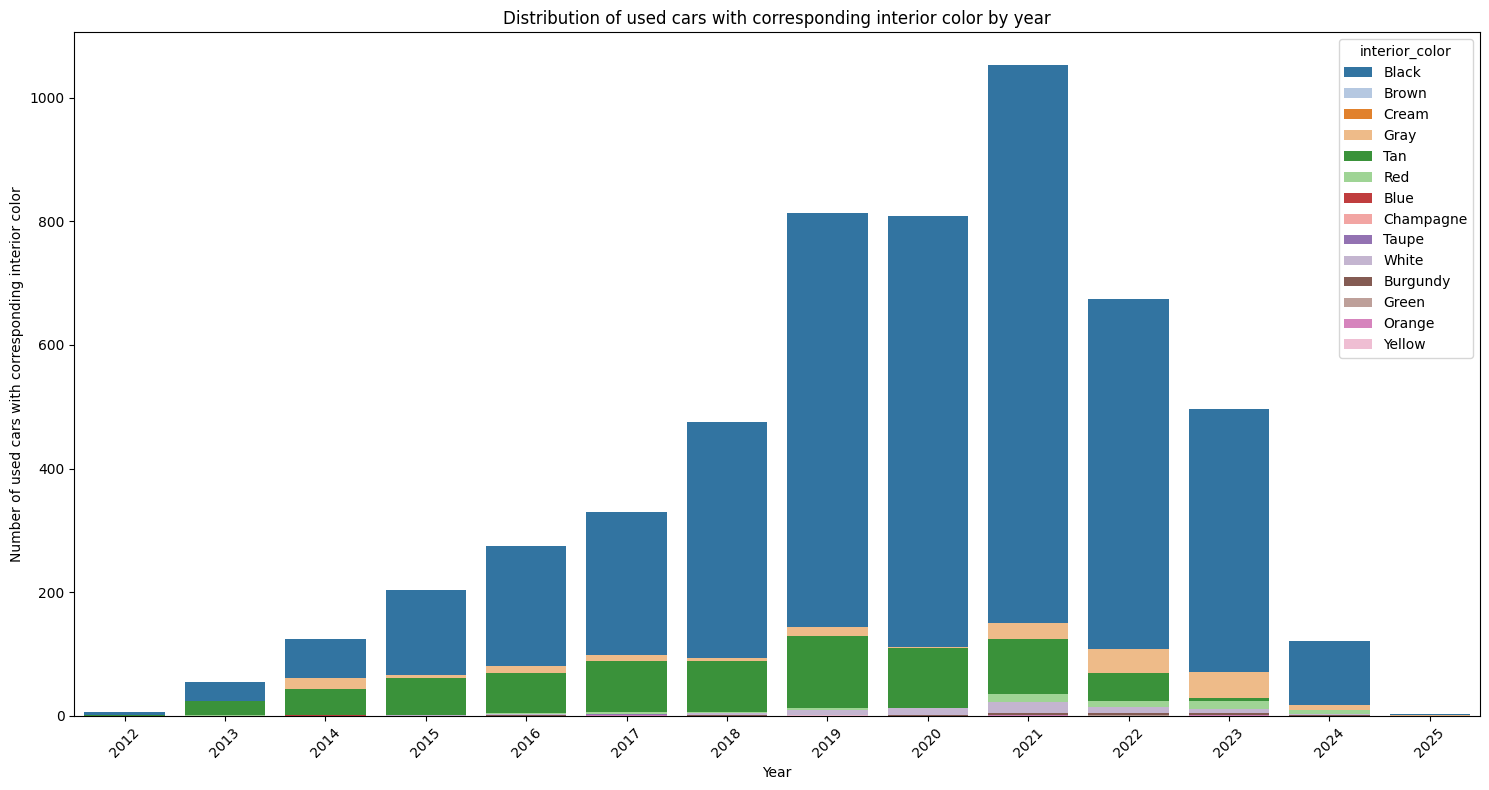

In [57]:
import seaborn as sns

color_year_counts = df_unique.groupby(['year', 'interior_color']).size().reset_index(name = 'count_by_year')

plt.figure(figsize=(15, 8))

sns.barplot(x = 'year', y = 'count_by_year', hue = 'interior_color', data = color_year_counts, dodge = False, palette = "tab20")

plt.xticks(rotation = 45)

plt.title('Distribution of used cars with corresponding interior color by year')
plt.xlabel('Year')
plt.ylabel('Number of used cars with corresponding interior color')

plt.tight_layout()
plt.show()

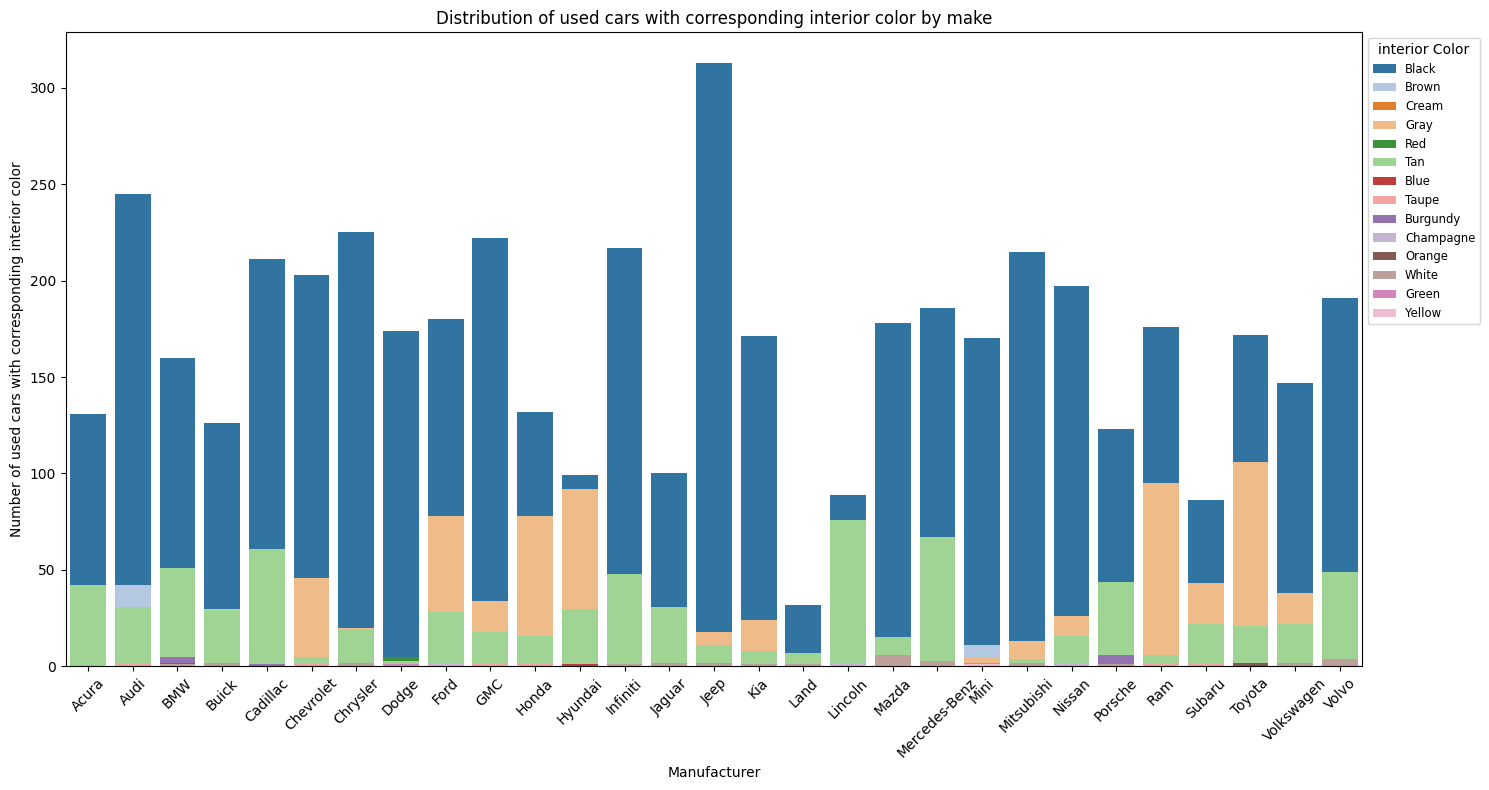

In [83]:
color_make_counts = df_unique.groupby(['make', 'interior_color']).size().reset_index(name = 'count_by_make')

plt.figure(figsize=(15, 8))

sns.barplot(x = 'make', y = 'count_by_make', hue = 'interior_color', data = color_make_counts, dodge = False, palette = "tab20")

plt.xticks(rotation = 45)

plt.title('Distribution of used cars with corresponding interior color by make')
plt.xlabel('Manufacturer')
plt.ylabel('Number of used cars with corresponding interior color')
plt.legend(title = 'interior Color', bbox_to_anchor = (1, 1), loc = 'upper left', fontsize = 'small', title_fontsize = 'medium', ncol = 1)

plt.tight_layout()
plt.show()

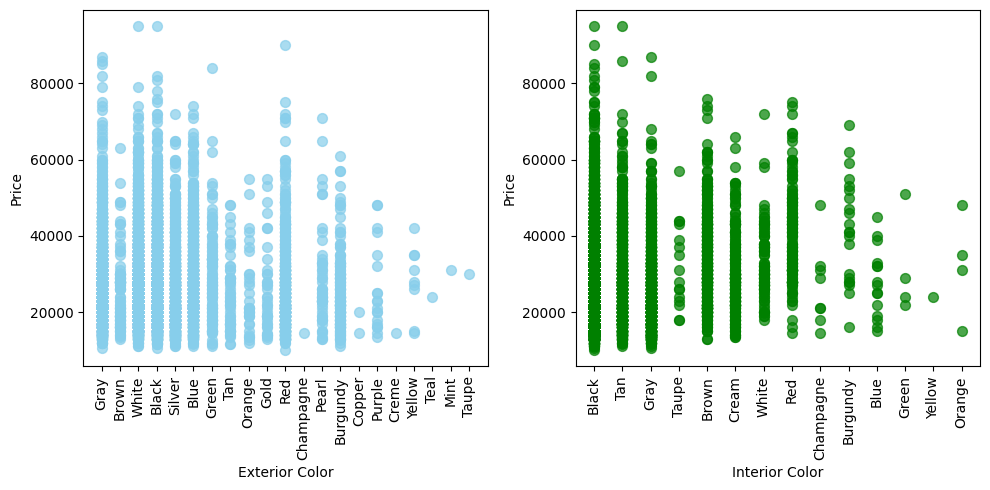

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].scatter(df_unique['exterior_color'], df_unique['price'], color = 'skyblue', alpha = 0.7, s = 50)
ax[0].set_xlabel("Exterior Color")
ax[0].set_ylabel("Price")
ax[0].tick_params(axis = 'x', rotation = 90)

ax[1].scatter(df_unique['interior_color'], df_unique['price'], color = 'g', alpha = 0.7, s = 50)
ax[1].set_xlabel("Interior Color")
ax[1].set_ylabel("Price")
ax[1].tick_params(axis = 'x', rotation = 90)

fig.tight_layout()
plt.show()

In [48]:
# Create dummy variables
df_color_dummies = pd.get_dummies(df_unique[['exterior_color', 'interior_color']], drop_first = True)

# Add the price column to the dummy variables
df_color_dummies['price'] = df_unique['price']

# Calculate the correlation matrix
correlation_matrix = df_color_dummies.corr()

# Correlation of color variables with price
correlation_with_price = correlation_matrix['price'].drop('price')
correlation_with_price


exterior_color_Blue         0.012198
exterior_color_Brown       -0.020218
exterior_color_Burgundy    -0.032929
exterior_color_Champagne   -0.014185
exterior_color_Copper      -0.016128
exterior_color_Creme       -0.014185
exterior_color_Gold        -0.017053
exterior_color_Gray        -0.005214
exterior_color_Green        0.016572
exterior_color_Mint         0.002713
exterior_color_Orange      -0.018057
exterior_color_Pearl        0.001738
exterior_color_Purple      -0.009648
exterior_color_Red         -0.051040
exterior_color_Silver      -0.082801
exterior_color_Tan         -0.025324
exterior_color_Taupe        0.001683
exterior_color_Teal        -0.004500
exterior_color_White        0.041138
exterior_color_Yellow      -0.000585
interior_color_Blue        -0.002531
interior_color_Brown        0.108183
interior_color_Burgundy     0.063780
interior_color_Champagne   -0.004495
interior_color_Cream        0.026301
interior_color_Gray        -0.103181
interior_color_Green        0.006458
i

# Conclusion
1. The exterior and interior colors of used cars have little impact on their prices.
2. In particular, interior colors of red and brown have has a very slight tendency to be associated with a higher price

# Fuel EDA
## Hypothesis 1
Hybrid cars have great advantages in terms of cost and performance, so the price of this model will be relatively high. 
## Hypothesis 2
Traditional models such as fuel vehicles are not much different in price from new models of electric vehicles because of their durability.

## Data cleaning
### Fill Electric for "fuel" column if empty when its "Motor" is Electric. 
### Remove data whose fuel is empty. 
### Drop duplicates via VIN. 

In [65]:
import numpy as np

df.loc[(df['fuel'].isna()) & (df['Motor'] == 'Electric'), 'fuel'] = 'Electric'
df_cleaned = df.dropna(subset = ['fuel'])
df_unique = df_cleaned.drop_duplicates(subset = 'VIN', keep = False)

df_unique

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
17,17,2018,Subaru,Impreza 2.0I Premium,17998,67000,28 city/37 hwy,Automatic,1.0,4S3GTAB63J3719160,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
18,18,2016,Subaru,Impreza 2.0I Sport Premium,13998,120000,27 city/36 hwy,Automatic,3.0,JF1GPAP66G8241959,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
19,19,2021,Subaru,Ascent Limited,27998,61000,20 city/26 hwy,Automatic,2.0,4S4WMAPD2M3400140,...,4.0,Turbo Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Brown,Tan
20,20,2023,Subaru,Crosstrek,20998,88000,22 city/29 hwy,Manual 6 Speed,1.0,JF2GTAAC4P9295325,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
21,21,2022,Subaru,Crosstrek Sport,27998,22000,27 city/34 hwy,Automatic,1.0,JF2GTHSC1NH258551,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10337,10358,2021,Acura,RDX A-Spec,36998,10000,22 city/27 hwy,Automatic,1.0,5J8TC1H66ML023257,...,4.0,Turbo Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Red
10338,10359,2022,Acura,MDX SH-AWD,41998,12000,19 city/25 hwy,Automatic,1.0,5J8YE1H30NL042278,...,6.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
10340,10361,2016,Acura,MDX,18998,89000,19 city/27 hwy,Automatic,2.0,5FRYD3H21GB014398,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
10341,10362,2020,Acura,MDX Technology,22998,117000,20 city/27 hwy,Automatic,1.0,5J8YD3H59LL010345,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Gray


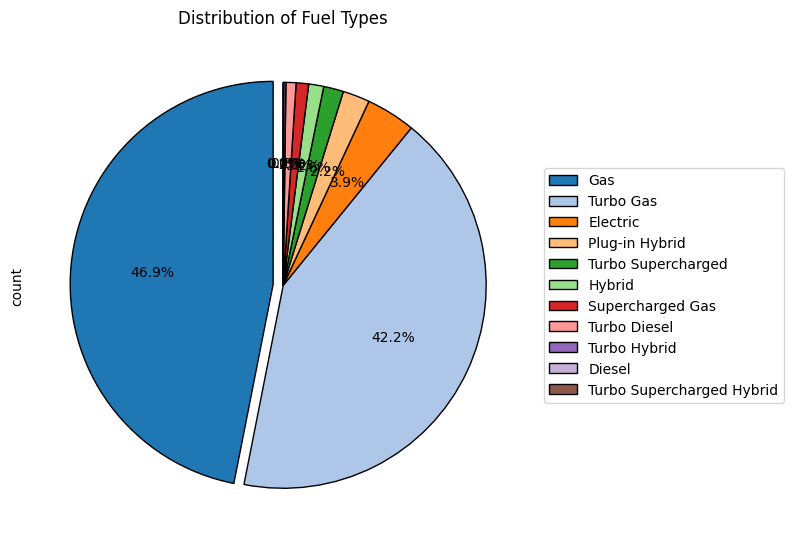

Index(['Gas', 'Turbo Gas', 'Electric', 'Plug-in Hybrid', 'Turbo Supercharged',
       'Hybrid', 'Supercharged Gas', 'Turbo Diesel', 'Turbo Hybrid', 'Diesel',
       'Turbo Supercharged Hybrid'],
      dtype='object', name='fuel')

In [66]:
fuel_count = df_unique["fuel"].value_counts()

plt.figure(figsize = (8, 8))
fuel_count.plot.pie(
    autopct = '%1.1f%%',
    explode = [0.05] + [0] * (len(fuel_count) - 1),
    wedgeprops = {'edgecolor': 'black'},
    colors = sns.color_palette("tab20"),
    startangle = 90,
    labels = None
)

plt.title('Distribution of Fuel Types')
plt.legend(labels = fuel_count.index, bbox_to_anchor = (1, 0.5), loc = 'center left')

plt.tight_layout()
plt.show()
fuel_count.index

### Toyota fuel EDA

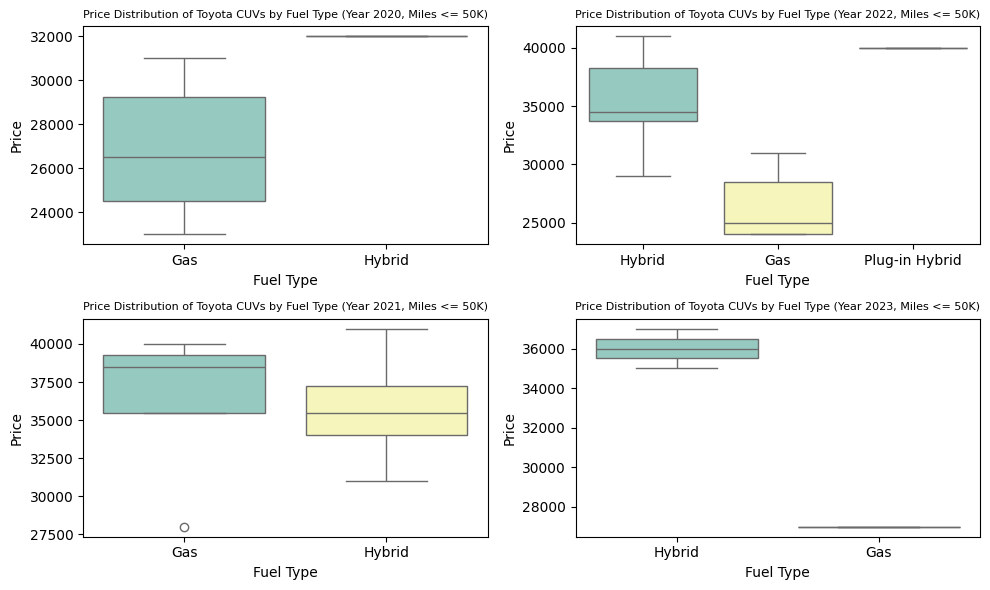

In [67]:
filtered_data_00 = df_unique[(df_unique['year'] == 2020) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_10 = df_unique[(df_unique['year'] == 2021) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_01 = df_unique[(df_unique['year'] == 2022) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_11 = df_unique[(df_unique['year'] == 2023) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Toyota')]

fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_00, hue = 'fuel', ax = ax[0, 0], palette = "Set3", legend = False)
ax[0,0].set_title('Price Distribution of Toyota CUVs by Fuel Type (Year 2020, Miles <= 50K)', fontsize = 8)
ax[0,0].set_xlabel('Fuel Type')
ax[0,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_01, hue = 'fuel', ax = ax[1,0], palette = "Set3", legend = False)
ax[1,0].set_title('Price Distribution of Toyota CUVs by Fuel Type (Year 2021, Miles <= 50K)', fontsize = 8)
ax[1,0].set_xlabel('Fuel Type')
ax[1,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_10, hue = 'fuel', ax = ax[0, 1], palette = "Set3", legend = False)
ax[0, 1].set_title('Price Distribution of Toyota CUVs by Fuel Type (Year 2022, Miles <= 50K)', fontsize = 8)
ax[0, 1].set_xlabel('Fuel Type')
ax[0, 1].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_11, hue = 'fuel', ax = ax[1,1], palette = "Set3", legend = False)
ax[1,1].set_title('Price Distribution of Toyota CUVs by Fuel Type (Year 2023, Miles <= 50K)', fontsize = 8)
ax[1,1].set_xlabel('Fuel Type')
ax[1,1].set_ylabel('Price')

fig.tight_layout()
plt.show()

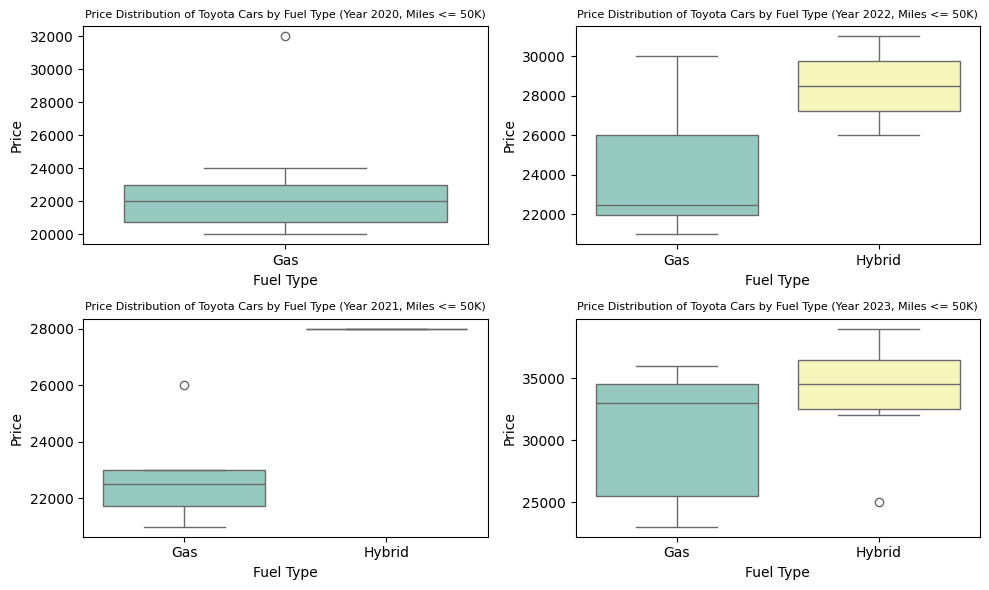

In [68]:
filtered_data_00 = df_unique[(df_unique['year'] == 2020) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("Car")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_10 = df_unique[(df_unique['year'] == 2021) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("Car")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_01 = df_unique[(df_unique['year'] == 2022) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("Car")) & 
                          (df_unique['make'] == 'Toyota')]

filtered_data_11 = df_unique[(df_unique['year'] == 2023) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("Car")) & 
                          (df_unique['make'] == 'Toyota')]

fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_00, hue = 'fuel', ax = ax[0, 0], palette = "Set3", legend = False)
ax[0,0].set_title('Price Distribution of Toyota Cars by Fuel Type (Year 2020, Miles <= 50K)', fontsize = 8)
ax[0,0].set_xlabel('Fuel Type')
ax[0,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_01, hue = 'fuel', ax = ax[1,0], palette = "Set3", legend = False)
ax[1,0].set_title('Price Distribution of Toyota Cars by Fuel Type (Year 2021, Miles <= 50K)', fontsize = 8)
ax[1,0].set_xlabel('Fuel Type')
ax[1,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_10, hue = 'fuel', ax = ax[0, 1], palette = "Set3", legend = False)
ax[0, 1].set_title('Price Distribution of Toyota Cars by Fuel Type (Year 2022, Miles <= 50K)', fontsize = 8)
ax[0, 1].set_xlabel('Fuel Type')
ax[0, 1].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_11, hue = 'fuel', ax = ax[1,1], palette = "Set3", legend = False)
ax[1,1].set_title('Price Distribution of Toyota Cars by Fuel Type (Year 2023, Miles <= 50K)', fontsize = 8)
ax[1,1].set_xlabel('Fuel Type')
ax[1,1].set_ylabel('Price')

fig.tight_layout()
plt.show()

### Ford fuel EDA

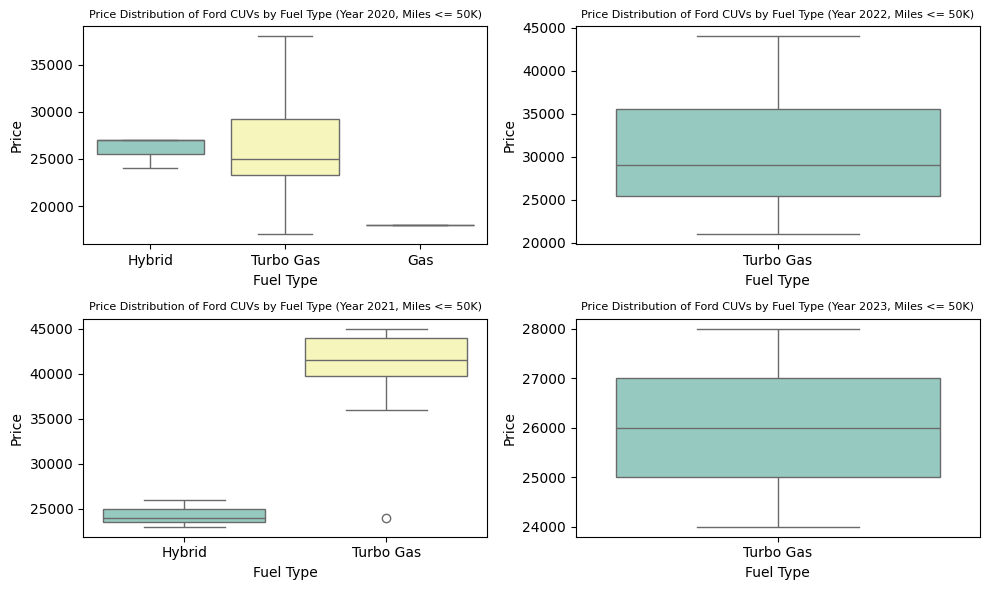

In [69]:
filtered_data_00 = df_unique[(df_unique['year'] == 2020) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_10 = df_unique[(df_unique['year'] == 2021) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_01 = df_unique[(df_unique['year'] == 2022) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_11 = df_unique[(df_unique['year'] == 2023) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("CUV")) & 
                          (df_unique['make'] == 'Ford')]

fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_00, hue = 'fuel', ax = ax[0, 0], palette = "Set3", legend = False)
ax[0,0].set_title('Price Distribution of Ford CUVs by Fuel Type (Year 2020, Miles <= 50K)', fontsize = 8)
ax[0,0].set_xlabel('Fuel Type')
ax[0,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_01, hue = 'fuel', ax = ax[1,0], palette = "Set3", legend = False)
ax[1,0].set_title('Price Distribution of Ford CUVs by Fuel Type (Year 2021, Miles <= 50K)', fontsize = 8)
ax[1,0].set_xlabel('Fuel Type')
ax[1,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_10, hue = 'fuel', ax = ax[0, 1], palette = "Set3", legend = False)
ax[0, 1].set_title('Price Distribution of Ford CUVs by Fuel Type (Year 2022, Miles <= 50K)', fontsize = 8)
ax[0, 1].set_xlabel('Fuel Type')
ax[0, 1].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_11, hue = 'fuel', ax = ax[1,1], palette = "Set3", legend = False)
ax[1,1].set_title('Price Distribution of Ford CUVs by Fuel Type (Year 2023, Miles <= 50K)', fontsize = 8)
ax[1,1].set_xlabel('Fuel Type')
ax[1,1].set_ylabel('Price')

fig.tight_layout()
plt.show()

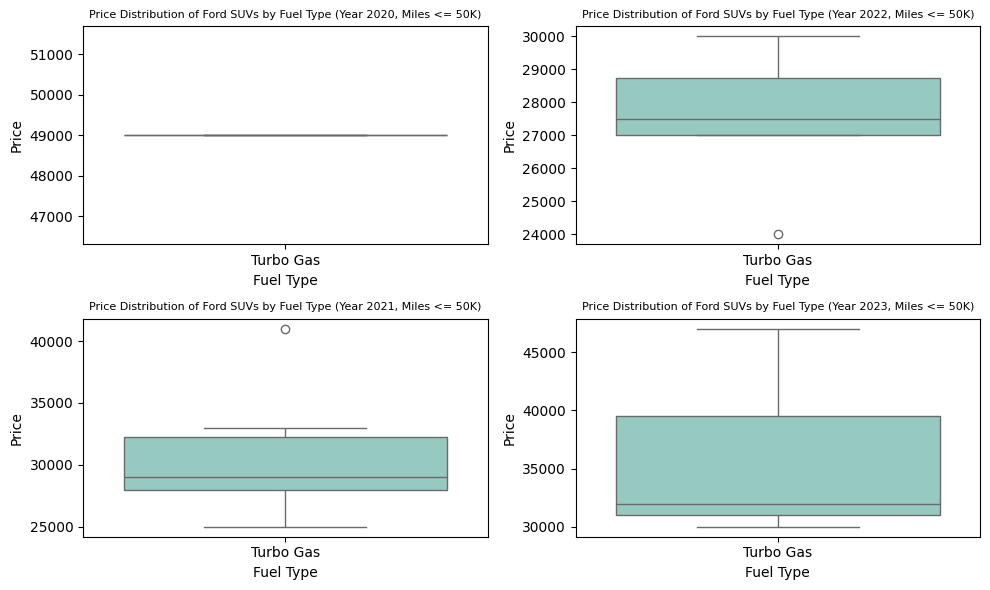

In [70]:
filtered_data_00 = df_unique[(df_unique['year'] == 2020) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("SUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_10 = df_unique[(df_unique['year'] == 2021) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("SUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_01 = df_unique[(df_unique['year'] == 2022) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("SUV")) & 
                          (df_unique['make'] == 'Ford')]

filtered_data_11 = df_unique[(df_unique['year'] == 2023) & 
                          (df_unique['mileage'] <= 50000) & 
                          (df_unique['class'].str.startswith("SUV")) & 
                          (df_unique['make'] == 'Ford')]

fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_00, hue = 'fuel', ax = ax[0, 0], palette = "Set3", legend = False)
ax[0,0].set_title('Price Distribution of Ford SUVs by Fuel Type (Year 2020, Miles <= 50K)', fontsize = 8)
ax[0,0].set_xlabel('Fuel Type')
ax[0,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_01, hue = 'fuel', ax = ax[1,0], palette = "Set3", legend = False)
ax[1,0].set_title('Price Distribution of Ford SUVs by Fuel Type (Year 2021, Miles <= 50K)', fontsize = 8)
ax[1,0].set_xlabel('Fuel Type')
ax[1,0].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_10, hue = 'fuel', ax = ax[0, 1], palette = "Set3", legend = False)
ax[0, 1].set_title('Price Distribution of Ford SUVs by Fuel Type (Year 2022, Miles <= 50K)', fontsize = 8)
ax[0, 1].set_xlabel('Fuel Type')
ax[0, 1].set_ylabel('Price')

sns.boxplot(x = 'fuel', y = 'price', data = filtered_data_11, hue = 'fuel', ax = ax[1,1], palette = "Set3", legend = False)
ax[1,1].set_title('Price Distribution of Ford SUVs by Fuel Type (Year 2023, Miles <= 50K)', fontsize = 8)
ax[1,1].set_xlabel('Fuel Type')
ax[1,1].set_ylabel('Price')

fig.tight_layout()
plt.show()

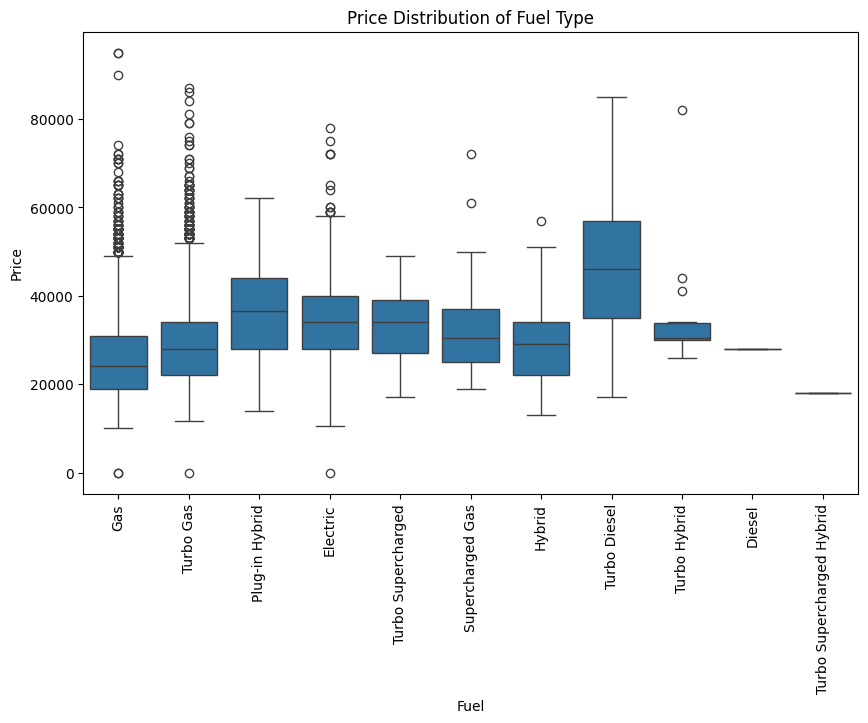

In [71]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuel', y = 'price', data = df_unique)
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.title("Price Distribution of Fuel Type")
plt.xticks(rotation = 90)
plt.show()

# Conclusion
Most of the used cars on the market are Gas and Turbo Gas powered.Based ont the median price of different fuel type. Plug-in Hybrid is at the higher price excluding Turbo Diesel.
Gas is at the lowest price.
